In [ ]:
# Task 05
# Food system

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import cv2
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Define dataset path
DATASET_PATH = "food-101"  
# Load dataset labels
labels = pd.read_csv(os.path.join(DATASET_PATH, "food-101/meta/train.txt"), header=None)
labels.columns = ["Image_Path"]
labels["Food_Label"] = labels["Image_Path"].apply(lambda x: x.split("/")[0])

In [ ]:
# Encode labels
l_encoder = LabelEncoder()
labels["Encoded_Label"] = l_encoder.fit_transform(labels["Food_Label"])

In [ ]:
# Define image size and batch size
IMG_SIZE = 128
BATCH_SIZE = 32
NUM_CLASSES = len(l_encoder.classes_)

In [ ]:
# Function to load and preprocess images
def load_image(image_path):
    image = cv2.imread(os.path.join(DATASET_PATH, "food-101/images", image_path + ".jpg"))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    return image / 255.0  

In [ ]:
def load_image(image_path):
    img_path = os.path.join(DATASET_PATH, "food-101/images", image_path + ".jpg")
    
    if not os.path.exists(img_path):
        print(f"Warning: File not found - {img_path}")
        return np.zeros((IMG_SIZE, IMG_SIZE, 3)) 
    
    image = cv2.imread(img_path)
    if image is None:
        print(f"Error loading image: {img_path}")
        return np.zeros((IMG_SIZE, IMG_SIZE, 3))
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    return image / 255.0


In [ ]:
import os
print(os.listdir(os.path.join(DATASET_PATH, "food-101/images"))[:10])  # List first 10 files

['.DS_Store', 'apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding']


In [ ]:
def load_image(image_path):
    for ext in [".jpg", ".jpeg", ".png"]:
        img_path = os.path.join(DATASET_PATH, "food-101/images", image_path + ext)
        if os.path.exists(img_path):
            image = cv2.imread(img_path)
            if image is not None:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
                return image / 255.0
    print(f"File not found: {image_path}")
    return np.zeros((IMG_SIZE, IMG_SIZE, 3))

In [ ]:
sample_size = min(5000, len(labels))  # Ensure sample_size is within range
sample_images = random.sample(list(labels["Image_Path"]), sample_size)

In [ ]:
img_path = os.path.join(DATASET_PATH, "food-101/images", sample_images[0] + ".jpg")
print(f"Checking: {img_path}")
image = cv2.imread(img_path)
print("Image Loaded:", image is not None)

Checking: food-101\food-101/images\ravioli/716121.jpg
Image Loaded: True


In [ ]:
X = np.array([load_image(img) for img in sample_images])
y = labels.loc[labels["Image_Path"].isin(sample_images), "Encoded_Label"].values
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (5000, 128, 128, 3)
y shape: (5000,)
X_train shape: (4000, 128, 128, 3)
y_train shape: (4000,)
X_val shape: (1000, 128, 128, 3)
y_val shape: (1000,)


In [ ]:
# Split the dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_test.shape)
print("y_val shape:", y_test.shape)

In [35]:
# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation="softmax")
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

C:\Users\Muhammad Haseeb\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=BATCH_SIZE)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 126s 918ms/step - accuracy: 0.0075 - loss: 4.6377 - val_accuracy: 0.0140 - val_loss: 4.6129
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 88s 695ms/step - accuracy: 0.0087 - loss: 4.6133 - val_accuracy: 0.0130 - val_loss: 4.6108
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 135s 643ms/step - accuracy: 0.0122 - loss: 4.6118 - val_accuracy: 0.0140 - val_loss: 4.6093
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 82s 658ms/step - accuracy: 0.0100 - loss: 4.6103 - val_accuracy: 0.0130 - val_loss: 4.6065
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 90s 717ms/step - accuracy: 0.0173 - loss: 4.5872 - val_accuracy: 0.0160 - val_loss: 4.6215
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 86s 691ms/step - accuracy: 0.0350 - loss: 4.4625 - val_accuracy: 0.0090 - val_loss: 4.6753
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 106s 851ms/step - accuracy: 0.0926 - loss: 4.1444 - val_accuracy: 0.0120 - val_loss: 4.9302
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 64s 509ms/step - accuracy: 0.2135 - loss

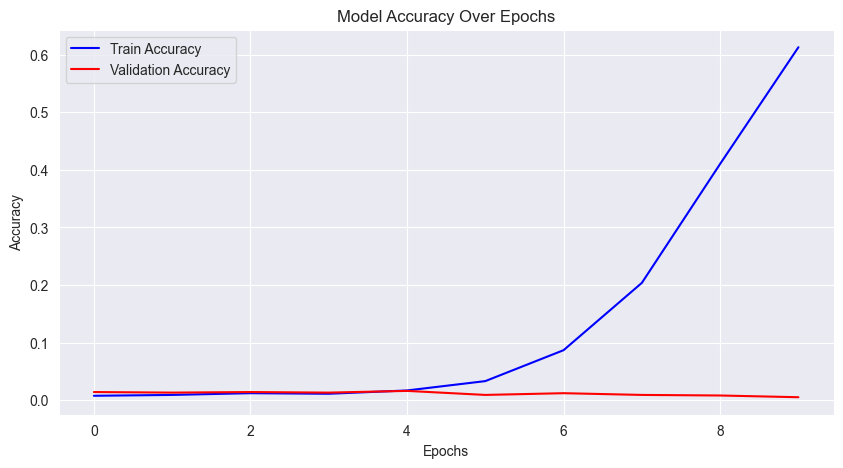

In [37]:
# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history["accuracy"], label="Train Accuracy", color="blue")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", color="red")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Over Epochs")
plt.legend()
plt.show()

In [38]:
# Function to predict food item and estimate calories
food_calories = {
    "apple_pie": 320,
    "club_sandwich": 300,
    "french_fries": 365,
    "pizza": 285,
    "sushi": 200,
}  

In [39]:
# Add more food items

def predict_food(image_path):
    img = load_image(image_path)
    img = np.expand_dims(img, axis=0)  # Reshape for prediction
    prediction = model.predict(img)
    label_index = np.argmax(prediction)
    food_name = encoder.inverse_transform([label_index])[0]
    calorie_estimate = food_calories.get(food_name, "Unknown")
    return food_name, calorie_estimate

In [40]:
# Example prediction
test_img = random.choice(sample_images)
food, calories = predict_food(test_img)
print(f"Predicted Food: {food}, Estimated Calories: {calories}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
Predicted Food: ceviche, Estimated Calories: Unknown
